## Task 1 : Machine Learning - Clustering 

In [1]:
#import some libraries for analysis
import pandas as pd
import numpy as np

# Import Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the url file into the pandas object
data = pd.read_excel('test.xlsx')
data1 = pd.read_excel('train.xlsx')

In [3]:
data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [4]:
data1

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2


In [5]:
data.shape

(15752, 18)

In [6]:
data1.shape

(36752, 19)

In [7]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [8]:
data1.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [9]:
data.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69
15751,-74,-68,-70,-80,-66,-61,-68,-62,-49,-79,-82,-71,-68,-74,-61,-57,-52,-56


In [10]:
data1.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2
36751,-66,-64,-70,-62,-59,-62,-53,-58,-64,-80,-73,-83,-67,-61,-56,-61,-67,-65,B45


In [11]:
train_data = pd.read_excel("train.xlsx")


In [12]:
train_data.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
24250,-61,-80,-61,-68,-49,-62,-56,-61,-60,-67,-69,-65,-64,-44,-50,-75,-64,-63,B43
32588,-47,-56,-57,-69,-70,-85,-69,-79,-83,-59,-57,-62,-86,-75,-70,-67,-80,-95,B4
15170,-57,-56,-77,-76,-74,-75,-78,-78,-82,-50,-55,-58,-65,-78,-81,-81,-73,-78,A3
5138,-65,-58,-68,-69,-57,-51,-55,-72,-70,-63,-60,-65,-62,-58,-56,-58,-60,-70,A52
27833,-95,-58,-61,-59,-61,-95,-95,-95,-62,-63,-65,-68,-95,-51,-95,-95,-95,-65,B48


In [13]:
test_data = pd.read_excel("test.xlsx")


In [14]:
test_data.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
7209,-55,-55,-74,-76,-71,-76,-77,-80,-85,-49,-55,-58,-66,-80,-80,-85,-71,-95
542,-55,-45,-61,-56,-57,-54,-68,-64,-62,-44,-55,-59,-61,-60,-61,-62,-61,-63
5341,-61,-67,-72,-62,-65,-45,-56,-66,-69,-61,-73,-63,-52,-39,-45,-59,-58,-64
15342,-71,-65,-74,-68,-53,-61,-52,-47,-56,-66,-67,-70,-63,-51,-72,-42,-68,-57
4951,-58,-62,-63,-78,-65,-64,-72,-82,-74,-57,-52,-58,-73,-68,-71,-80,-86,-79


## Statistical Description for train data 

In [15]:
train_data.describe().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


## Statistical Decription for test Data 

In [16]:
test_data.describe().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000
mean,-65.871191,-64.506539,-64.514030,-65.255523,-64.557770,-63.273680,-67.047169,-66.730637,-65.725114,-65.526981,-65.586338,-66.112430,-63.968068,-64.471115,-64.654393,-64.257110,-65.928390,-66.602844
std,8.756142,9.016451,8.175667,8.179889,8.056777,8.589670,9.160641,10.190709,10.519560,10.443959,9.555815,8.922019,8.158542,9.463673,9.158459,10.481551,10.000258,10.468128
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-65.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-58.000000,-59.000000,-61.000000,-60.000000,-57.000000,-60.000000,-59.000000,-59.000000,-58.000000,-59.000000,-60.000000,-58.000000,-58.000000,-59.000000,-57.000000,-59.000000,-60.000000
max,-41.000000,-36.000000,-42.000000,-41.000000,-32.000000,-39.000000,-46.000000,-40.000000,-39.000000,-41.000000,-43.000000,-43.000000,-44.000000,-39.000000,-38.000000,-41.000000,-43.000000,-39.000000


## Checking Null Values For train data

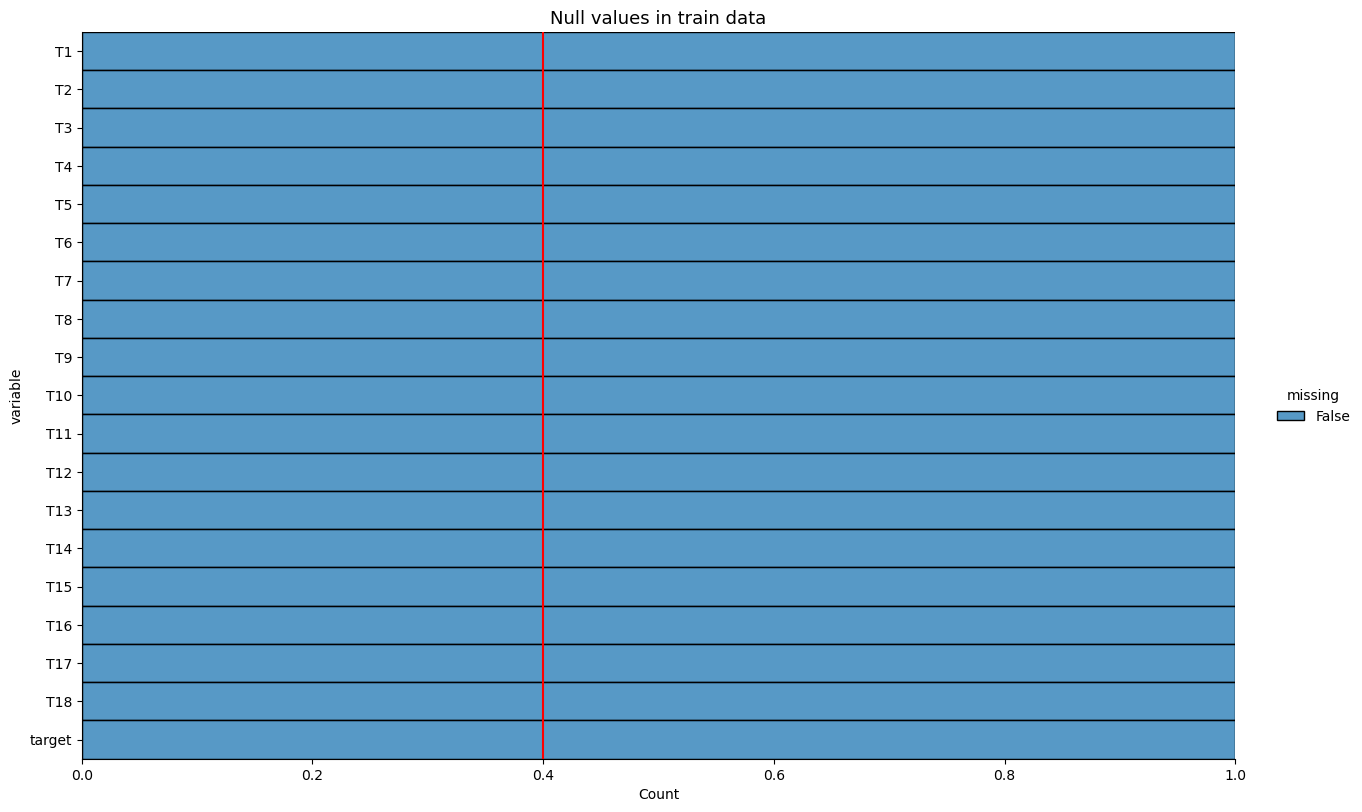

In [17]:
sns.displot(data=train_data.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

## Cheking for null values test data

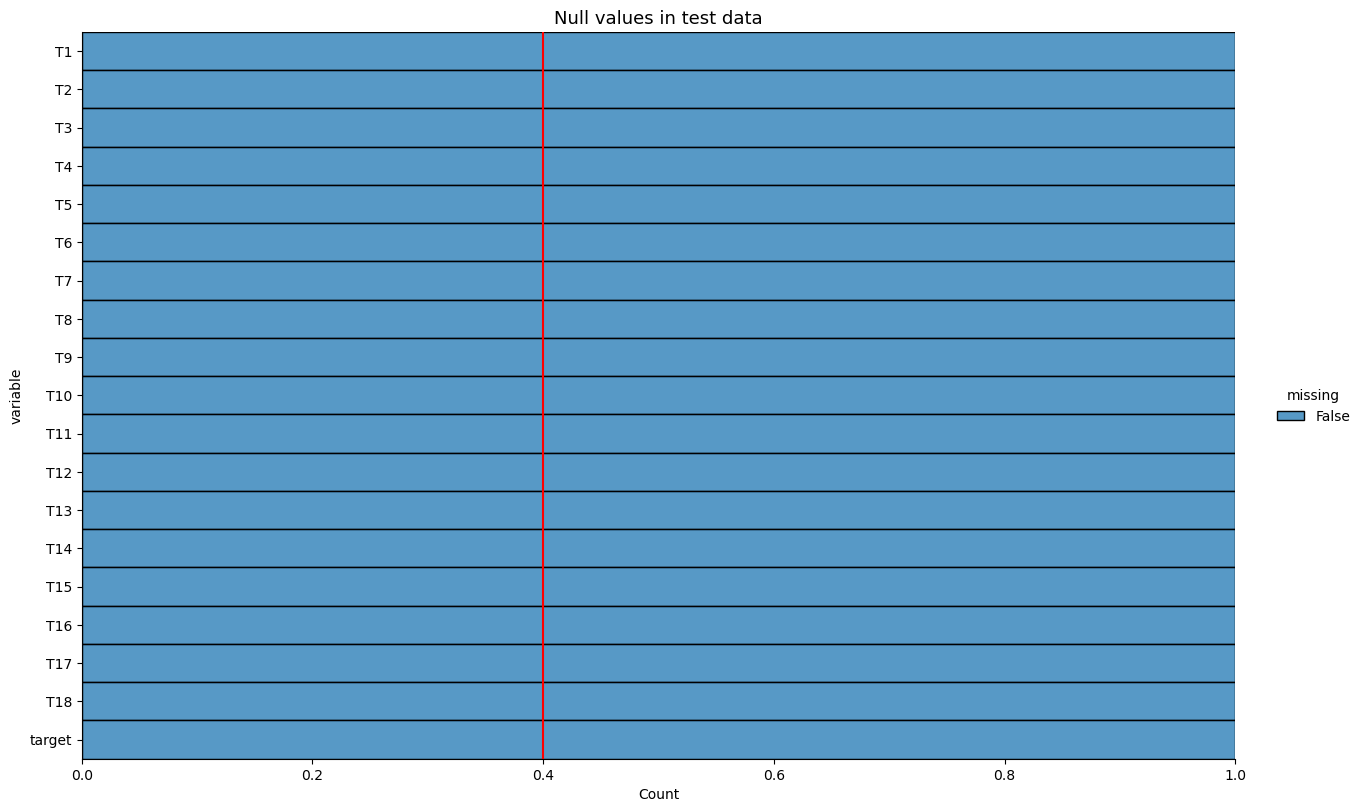

In [18]:
sns.displot(data=train_data.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in test data",fontsize = 13)
plt.show()

In [19]:
print("Shape of train data is: ",train_data.shape)
print("Shape of test data is: ",test_data.shape)

Shape of train data is:  (36752, 19)
Shape of test data is:  (15752, 18)


## Checking duplicate in train data

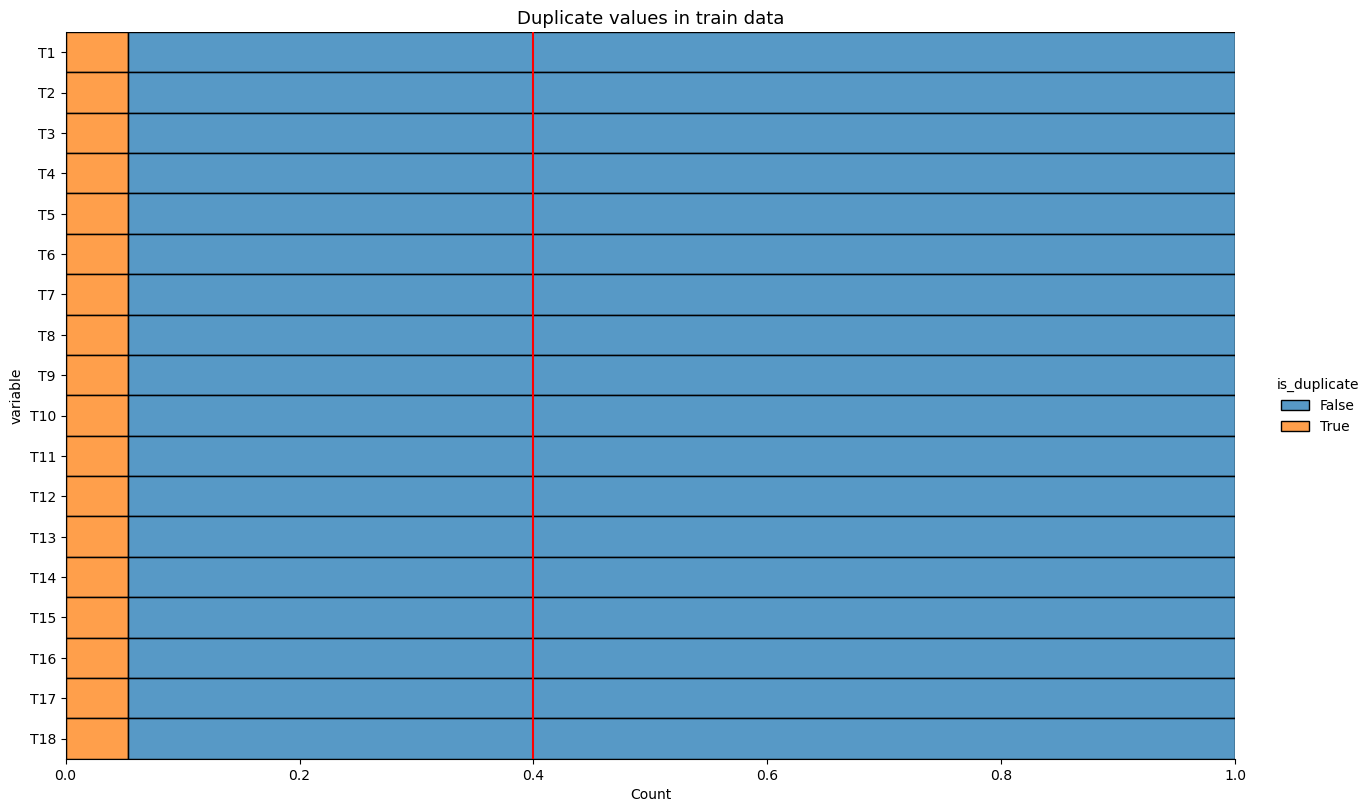

In [20]:
duplicates = train_data.duplicated(keep=False)

duplicate_data = test_data.copy()
duplicate_data['is_duplicate'] = duplicates

sns.displot(data=duplicate_data.melt(id_vars='is_duplicate', value_name='value'),
            y='variable',
            hue='is_duplicate',
            multiple='fill',
            height=8,
            aspect=1.6)
plt.axvline(0.4, color='r')
plt.title("Duplicate values in train data", fontsize=13)
plt.show()

## Checking Duplicate in test Data

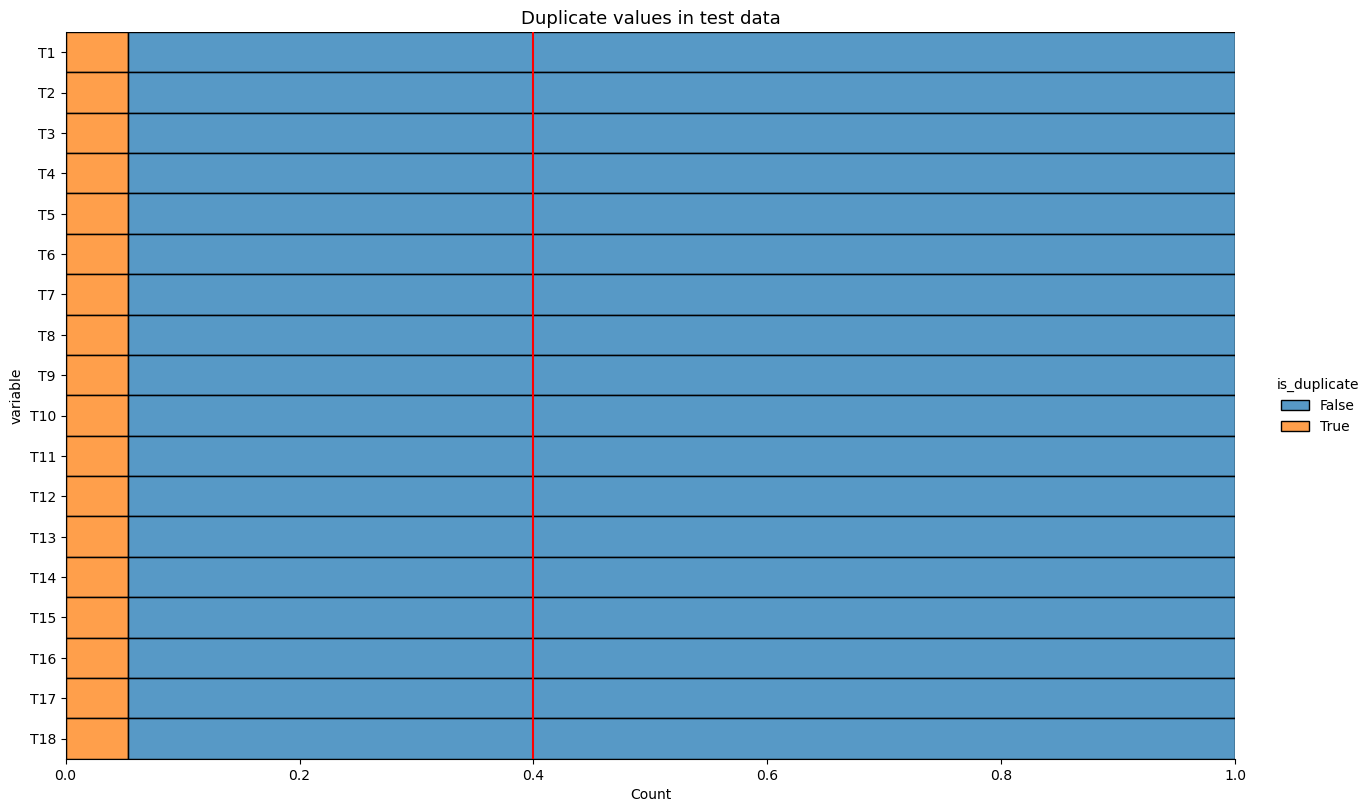

In [21]:
duplicates = train_data.duplicated(keep=False)

duplicate_data = test_data.copy()
duplicate_data['is_duplicate'] = duplicates

sns.displot(data=duplicate_data.melt(id_vars='is_duplicate', value_name='value'),
            y='variable',
            hue='is_duplicate',
            multiple='fill',
            height=8,
            aspect=1.6)
plt.axvline(0.4, color='r')
plt.title("Duplicate values in test data", fontsize=13)
plt.show()

In [22]:
def duplicate_check(data):
    duplicate = data.duplicated().sum()
    print(f'Data have total {duplicate} values')
    if duplicate > 0:
        data = data.drop_duplicates()
    print("Duplicates after droping:",data.duplicated().sum())
    print("==================================================")
    return data

In [23]:
train_data = duplicate_check(train_data)


Data have total 1267 values
Duplicates after droping: 0


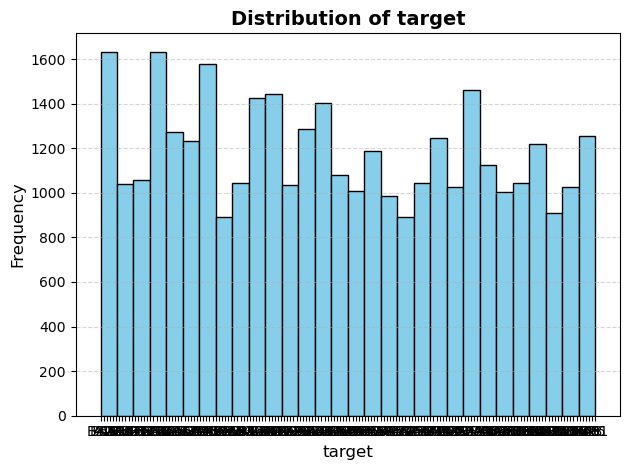

In [24]:
plt.hist(train_data['target'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of target', fontsize=14, fontweight='bold')
plt.xlabel('target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

## Checking Outliers 

### Cheking Outliers In Test Data  

In [25]:
data.shape

(15752, 18)

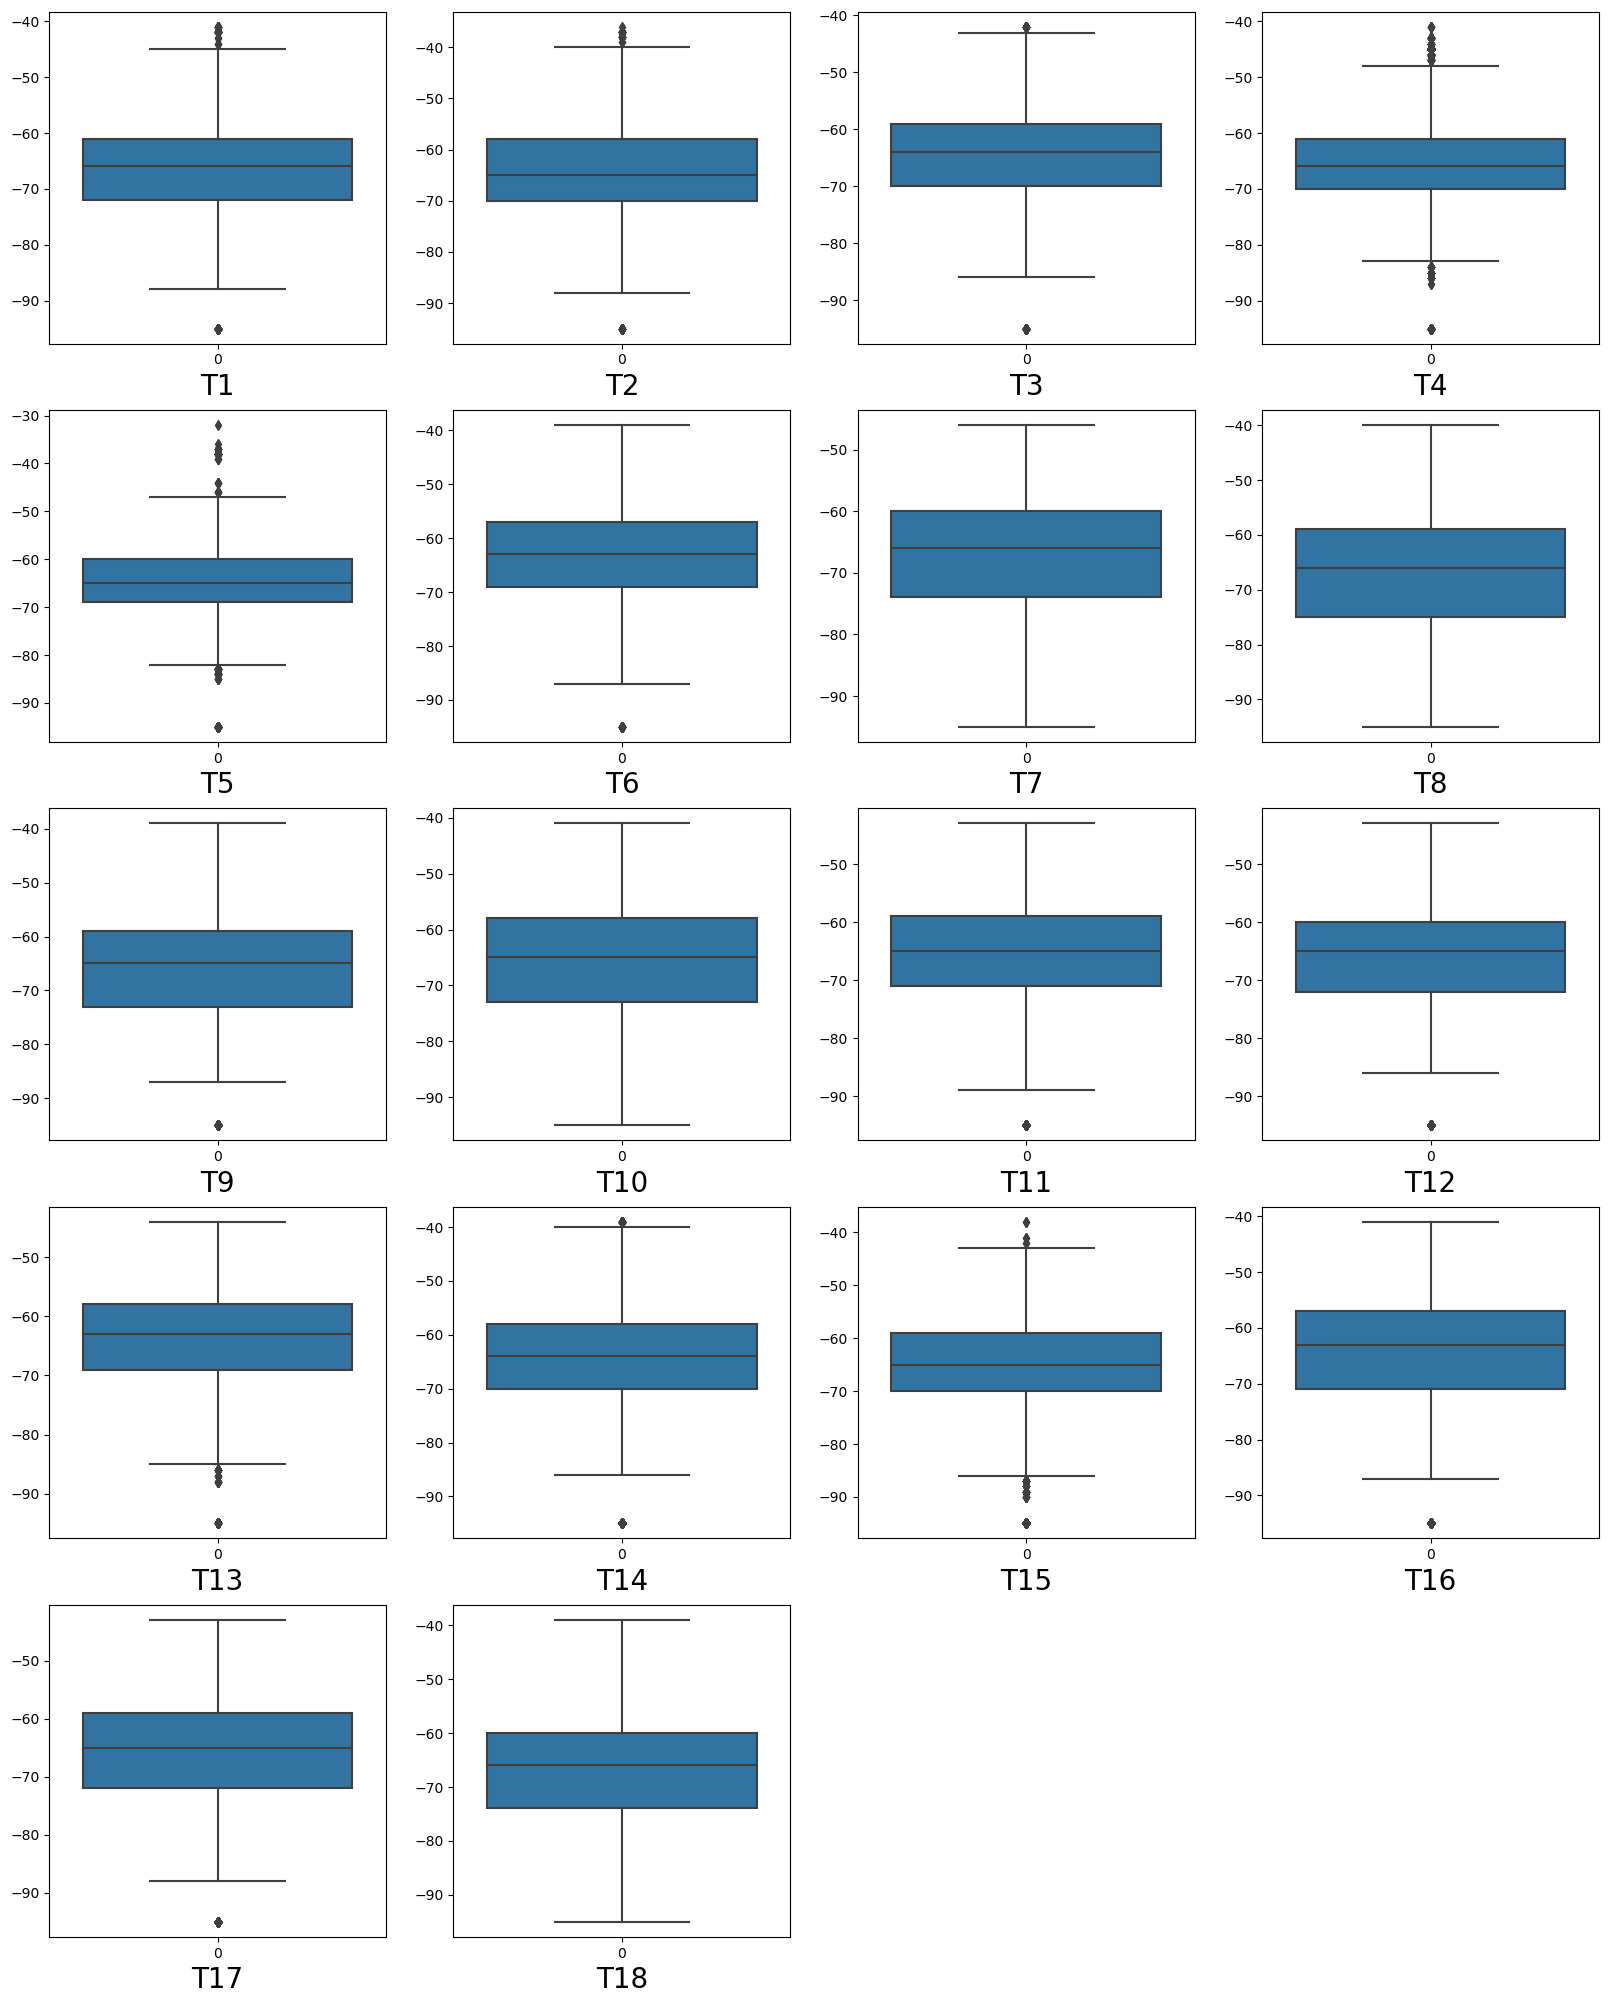

In [26]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


-  Here we See That some ouliers are present in this dataset.

In [27]:
def out1(num_out):
    q1=(num_out).quantile(0.25)
    q3=(num_out).quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5)*iqr
    upper=q3+(1.5)*iqr

    return lower,upper

In [28]:
lower,upper=out1(data['T1'])
print(lower, upper)

-88.5 -44.5


In [29]:
lower, upper = out1(data['T1'])
print(lower, upper)

data = data[(data['T1'] > lower) & (data['T1'] < upper)]
data

-88.5 -44.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [30]:
data.shape

(15511, 18)

In [31]:
lower,upper=out1(data['T2'])
print(lower, upper)

-86.5 -42.5


In [32]:
lower, upper = out1(data['T2'])
print(lower, upper)

data = data[(data['T2'] > lower) & (data['T2'] < upper)]
data

-86.5 -42.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [33]:
lower,upper=out1(data['T3'])
print(lower, upper)

-86.5 -42.5


In [34]:
lower, upper = out1(data['T3'])
print(lower, upper)

data = data[(data['T3'] > lower) & (data['T3'] < upper)]
data

-86.5 -42.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [35]:
lower,upper=out1(data['T4'])
print(lower, upper)

-83.5 -47.5


In [36]:
lower, upper = out1(data['T4'])
print(lower, upper)

data = data[(data['T4'] > lower) & (data['T4'] < upper)]
data

-83.5 -47.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [37]:
lower,upper=out1(data['T5'])
print(lower, upper)

-82.5 -46.5


In [38]:
lower, upper = out1(data['T5'])
print(lower, upper)

data = data[(data['T5'] > lower) & (data['T5'] < upper)]
data

-82.5 -46.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [39]:
lower,upper=out1(data['T6'])
print(lower, upper)

-87.0 -39.0


In [40]:
lower, upper = out1(data['T6'])
print(lower, upper)

data = data[(data['T6'] > lower) & (data['T6'] < upper)]
data

-87.0 -39.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [41]:
lower,upper=out1(data['T9'])
print(lower, upper)

-95.5 -35.5


In [42]:
lower, upper = out1(data['T9'])
print(lower, upper)

data = data[(data['T9'] > lower) & (data['T9'] < upper)]
data

-95.5 -35.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [43]:
lower,upper=out1(data['T11'])
print(lower, upper)

-89.0 -41.0


In [44]:
lower, upper = out1(data['T11'])
print(lower, upper)

data = data[(data['T11'] > lower) & (data['T11'] < upper)]
data

-89.0 -41.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [45]:
lower,upper=out1(data['T12'])
print(lower, upper)

-88.5 -44.5


In [46]:
lower, upper = out1(data['T12'])
print(lower, upper)

data = data[(data['T12'] > lower) & (data['T12'] < upper)]
data

-88.5 -44.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [47]:
lower,upper=out1(data['T13'])
print(lower, upper)

-85.5 -41.5


In [48]:
lower, upper = out1(data['T13'])
print(lower, upper)

data = data[(data['T13'] > lower) & (data['T13'] < upper)]
data

-85.5 -41.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [49]:
lower,upper=out1(data['T14'])
print(lower, upper)

-88.0 -40.0


In [50]:
lower, upper = out1(data['T14'])
print(lower, upper)

data = data[(data['T14'] > lower) & (data['T14'] < upper)]
data

-88.0 -40.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [51]:
lower,upper=out1(data['T15'])
print(lower, upper)

-86.5 -42.5


In [52]:
lower, upper = out1(data['T15'])
print(lower, upper)

data = data[(data['T15'] > lower) & (data['T15'] < upper)]
data

-86.5 -42.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [53]:
lower,upper=out1(data['T16'])
print(lower, upper)

-92.0 -36.0


In [54]:
lower, upper = out1(data['T16'])
print(lower, upper)

data = data[(data['T16'] > lower) & (data['T16'] < upper)]
data

-92.0 -36.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [55]:
lower,upper=out1(data['T17'])
print(lower, upper)

-89.625 -40.625


In [56]:
lower, upper = out1(data['T17'])
print(lower, upper)

data = data[(data['T17'] > lower) & (data['T17'] < upper)]
data

-89.625 -40.625


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


In [57]:
lower,upper=out1(data['T18'])
print(lower, upper)

-94.0 -38.0


In [58]:
lower, upper = out1(data['T18'])
print(lower, upper)

data = data[(data['T18'] > lower) & (data['T18'] < upper)]
data

-94.0 -38.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,-66,-69,-78,-63,-58,-64,-57,-64,-65,-62,-66,-69,-58,-56,-69,-53,-62,-54
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54


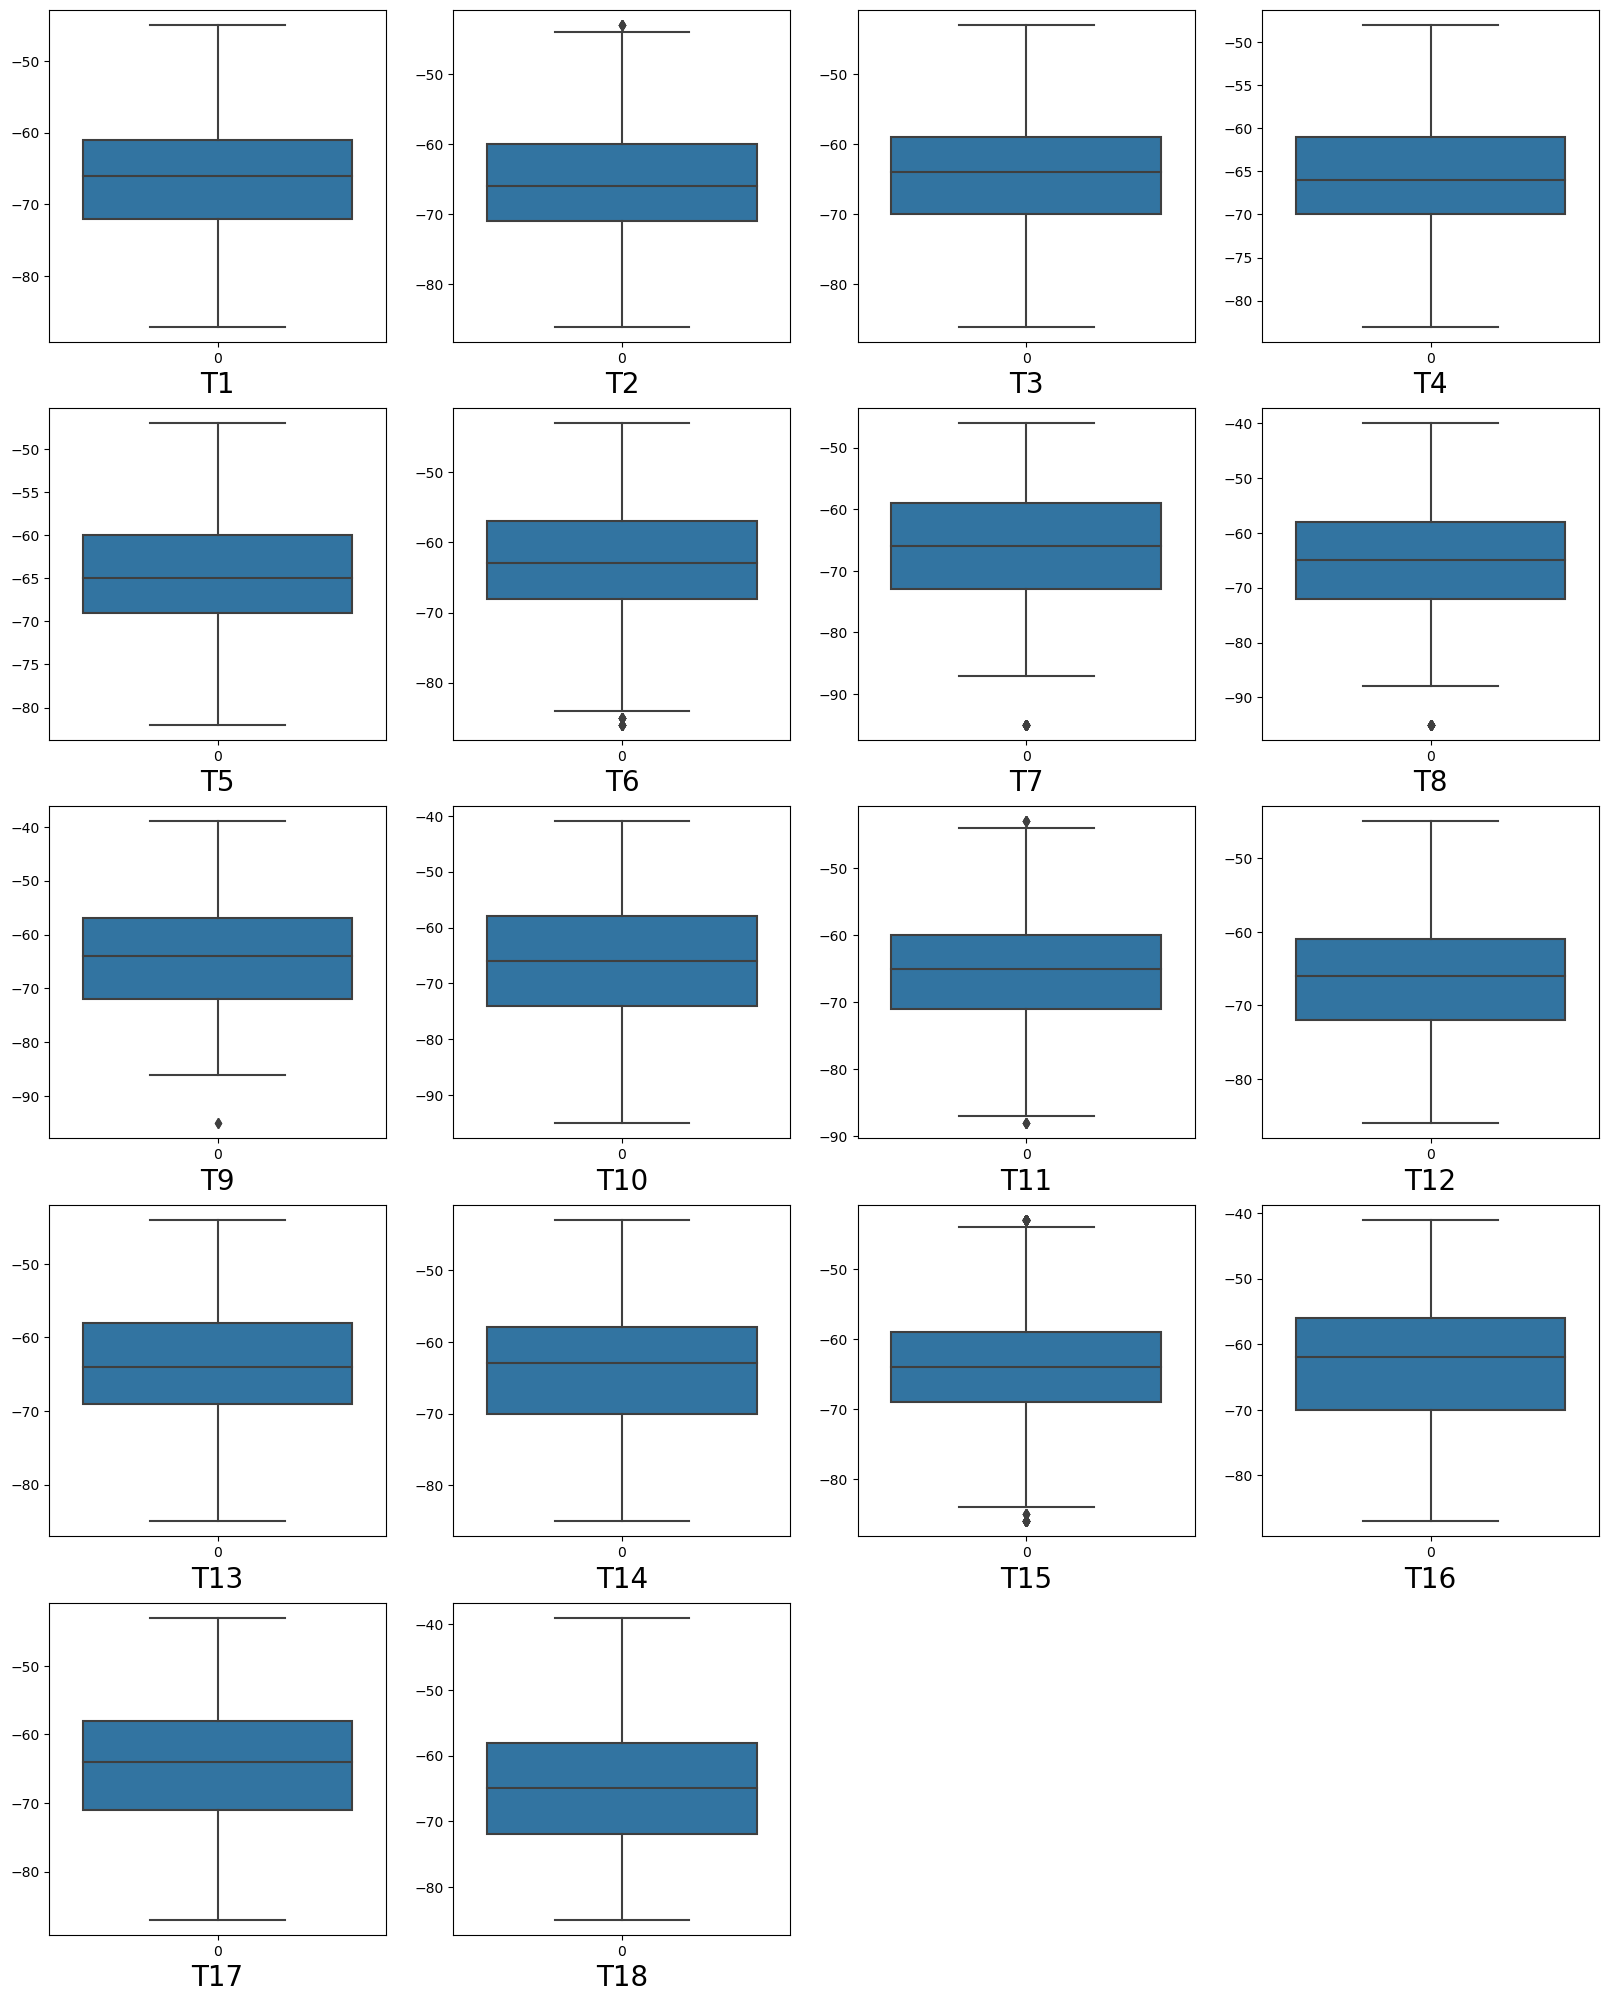

In [59]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


-  Here we see that ouliers are removed in test dataset

## Checking outliers in train data

In [60]:
data1.target.unique()

array(['B37', 'B61', 'A19', 'A22', 'A33', 'A75', 'A41', 'B14', 'B80',
       'B64', 'A1', 'B21', 'A70', 'B57', 'B9', 'B50', 'B31', 'A21', 'B30',
       'A4', 'B40', 'B6', 'A64', 'A25', 'B18', 'A66', 'A53', 'B73', 'A50',
       'B25', 'A29', 'A35', 'A3', 'A46', 'B45', 'A36', 'B5', 'A79', 'A32',
       'B23', 'A7', 'A62', 'A71', 'A58', 'A9', 'B63', 'B51', 'B8', 'B36',
       'A14', 'A15', 'A24', 'B38', 'A10', 'B4', 'A37', 'A12', 'B41',
       'A17', 'B49', 'B71', 'B59', 'B39', 'B29', 'A76', 'B58', 'B28',
       'A77', 'A67', 'B24', 'A31', 'A34', 'A5', 'B34', 'A11', 'B16',
       'B20', 'A63', 'B53', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55',
       'B11', 'A42', 'B22', 'B67', 'A74', 'A57', 'A8', 'B46', 'B15',
       'A51', 'A40', 'A59', 'A72', 'B32', 'A2', 'A13', 'B17', 'A65',
       'A52', 'A47', 'B47', 'B77', 'B3', 'B35', 'B44', 'A80', 'B43',
       'B54', 'B75', 'A49', 'B52', 'B33', 'B2', 'B1', 'A39', 'B7', 'A20',
       'A18', 'B12', 'A27', 'A6', 'A68', 'B72', 'B66', 'B69', 'A26',
   

In [61]:
data1.target=data1.target.map({'B37':1})

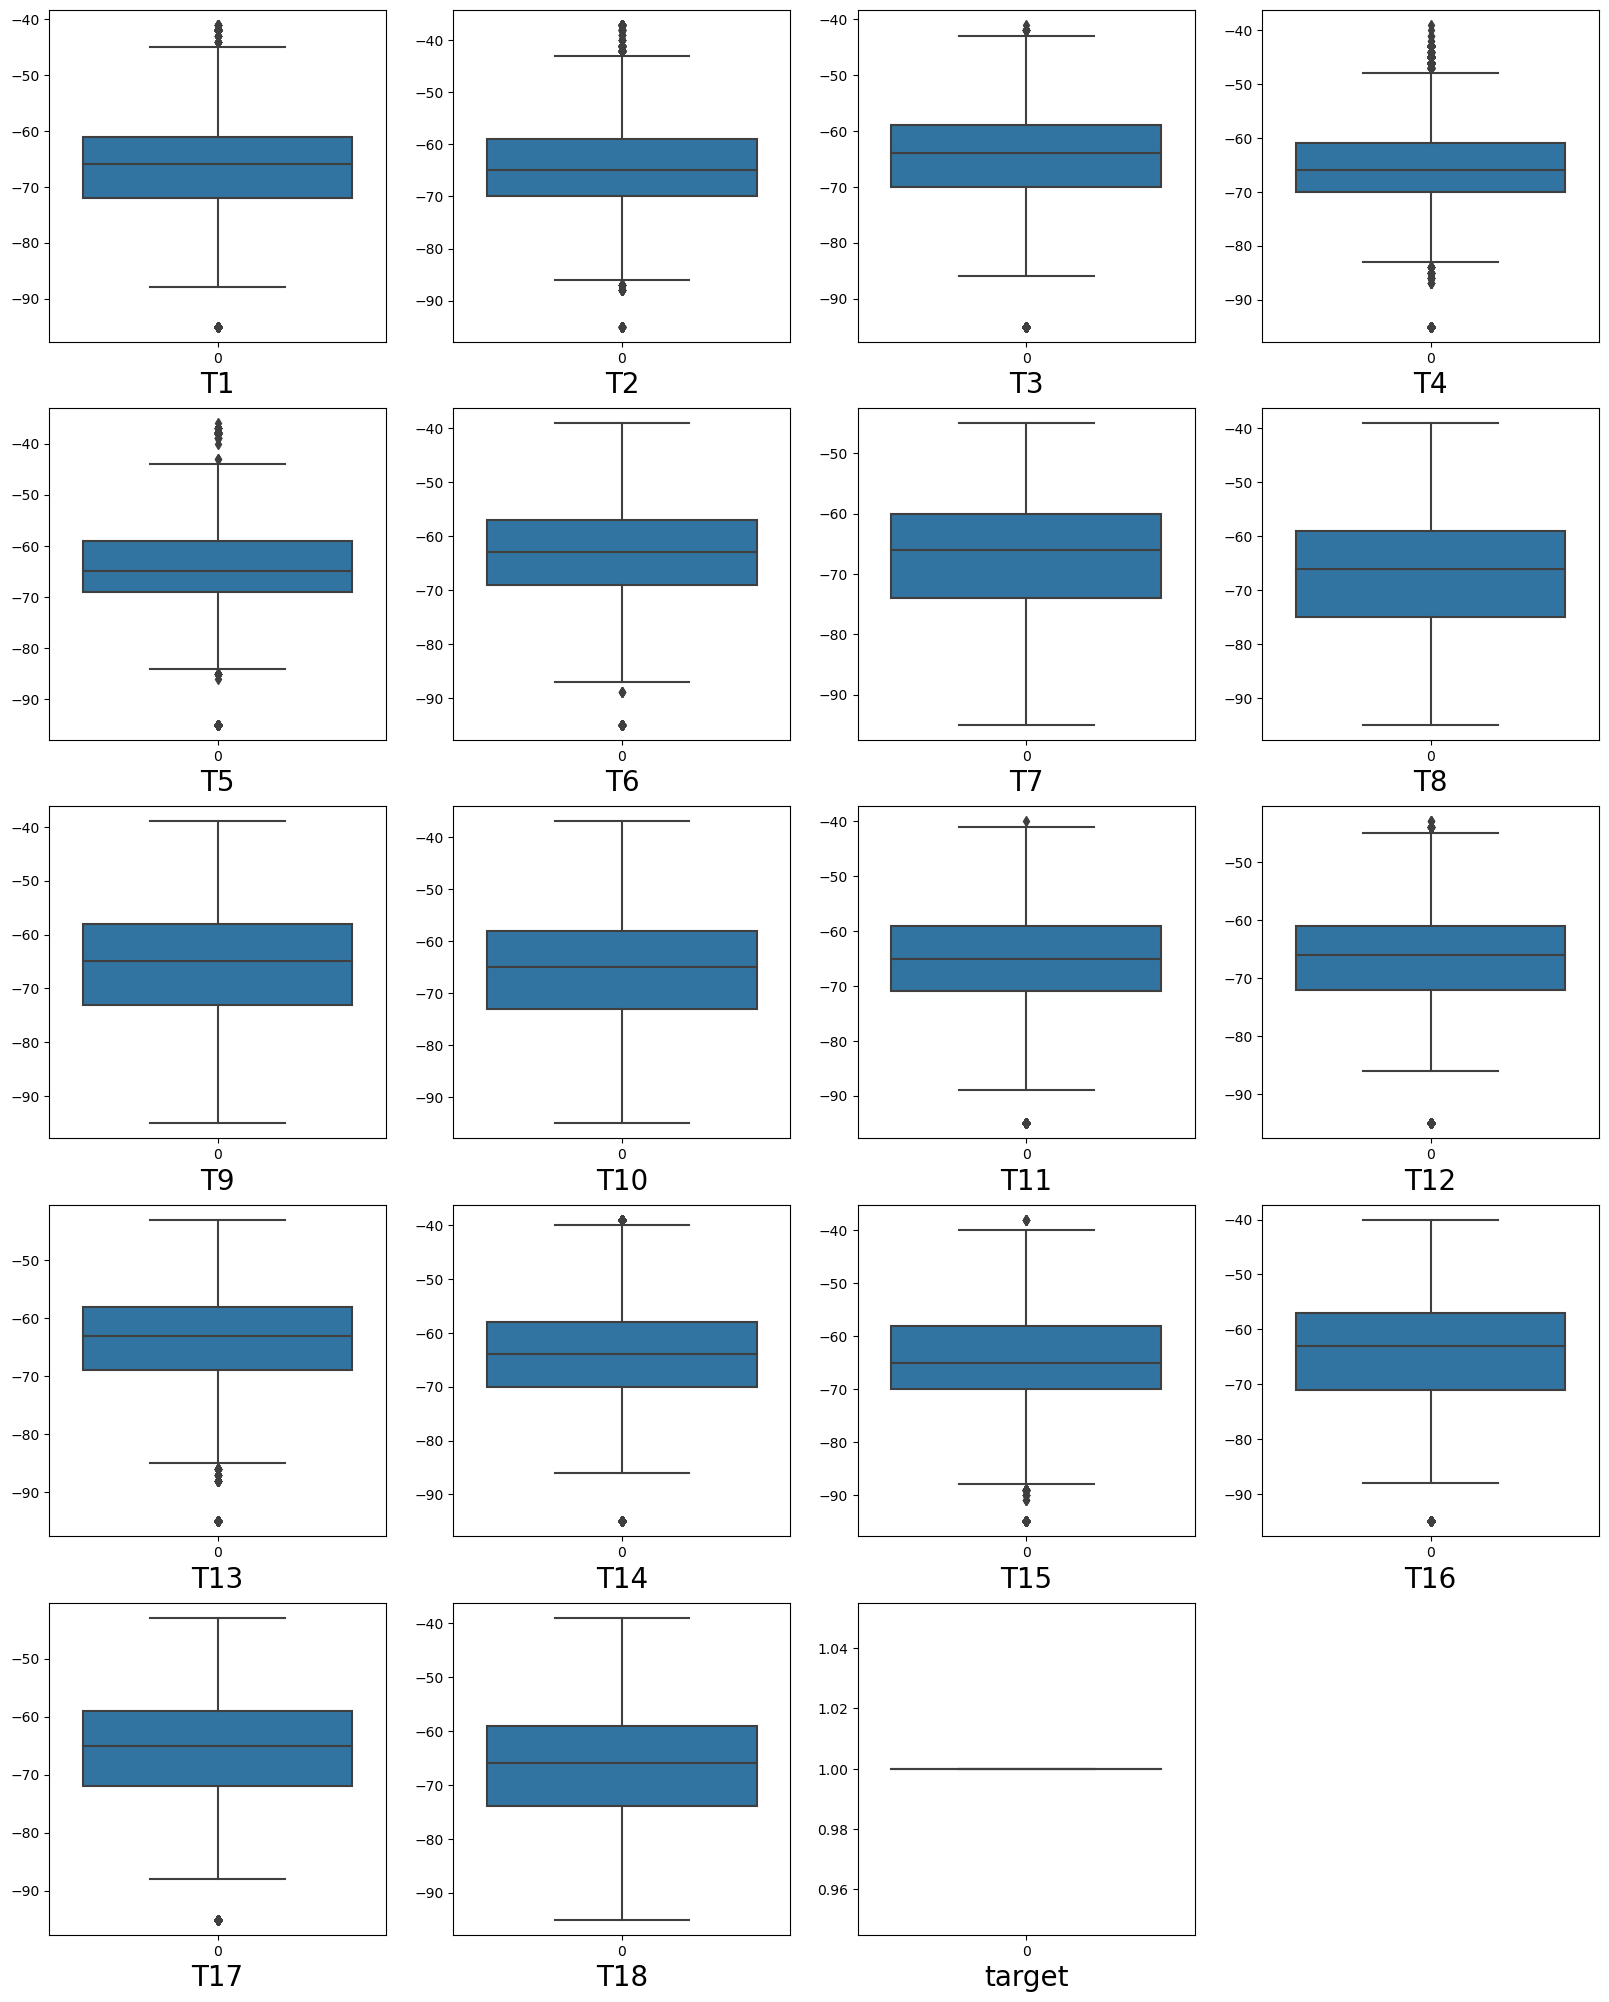

In [62]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


In [63]:
def out2(num_out):
    q1=(num_out).quantile(0.25)
    q3=(num_out).quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5)*iqr
    upper=q3+(1.5)*iqr

    return lower,upper
      

In [64]:
lower,upper=out2(data1['T1'])
print(lower, upper)

-88.5 -44.5


In [65]:
lower, upper = out2(data1['T1'])
print(lower, upper)

data1 = data1[(data1['T1'] > lower) & (data1['T1'] < upper)]
data1

-88.5 -44.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [66]:
lower,upper=out2(data1['T2'])
print(lower, upper)

-86.5 -42.5


In [67]:
lower, upper = out2(data1['T2'])
print(lower, upper)

data1 = data1[(data1['T2'] > lower) & (data1['T2'] < upper)]
data1

-86.5 -42.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [68]:
lower,upper=out2(data1['T3'])
print(lower, upper)

-86.5 -42.5


In [69]:
lower, upper = out2(data1['T3'])
print(lower, upper)

data1 = data1[(data1['T3'] > lower) & (data1['T3'] < upper)]
data1

-86.5 -42.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [70]:
lower,upper=out2(data1['T4'])
print(lower, upper)

-83.5 -47.5


In [71]:
lower, upper = out2(data1['T4'])
print(lower, upper)

data1 = data1[(data1['T4'] > lower) & (data1['T4'] < upper)]
data1

-83.5 -47.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [72]:
lower,upper=out2(data1['T5'])
print(lower, upper)

-84.0 -44.0


In [73]:
lower, upper = out2(data1['T5'])
print(lower, upper)

data1 = data1[(data1['T5'] > lower) & (data1['T5'] < upper)]
data1

-84.0 -44.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [74]:
lower,upper=out2(data1['T6'])
print(lower, upper)

-87.0 -39.0


In [75]:
lower, upper = out2(data1['T6'])
print(lower, upper)

data1 = data1[(data1['T6'] > lower) & (data1['T6'] < upper)]
data1

-87.0 -39.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [76]:
lower,upper=out2(data1['T11'])
print(lower, upper)

-87.5 -43.5


In [77]:
lower, upper = out2(data1['T11'])
print(lower, upper)

data1 = data1[(data1['T11'] > lower) & (data1['T11'] < upper)]
data1

-87.5 -43.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [78]:
lower,upper=out2(data1['T12'])
print(lower, upper)

-88.5 -44.5


In [79]:
lower, upper = out2(data1['T12'])
print(lower, upper)

data1 = data1[(data1['T12'] > lower) & (data1['T12'] < upper)]
data1

-88.5 -44.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [80]:
lower,upper=out2(data1['T13'])
print(lower, upper)

-85.5 -41.5


In [81]:
lower, upper = out2(data1['T13'])
print(lower, upper)

data1 = data1[(data1['T13'] > lower) & (data1['T13'] < upper)]
data1

-85.5 -41.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [82]:
lower,upper=out2(data1['T14'])
print(lower, upper)

-88.0 -40.0


In [83]:
lower, upper = out2(data1['T14'])
print(lower, upper)

data1 = data1[(data1['T14'] > lower) & (data1['T14'] < upper)]
data1

-88.0 -40.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [84]:
lower,upper=out2(data1['T15'])
print(lower, upper)

-86.5 -42.5


In [85]:
lower, upper = out2(data1['T15'])
print(lower, upper)

data1 = data1[(data1['T15'] > lower) & (data1['T15'] < upper)]
data1

-86.5 -42.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [86]:
lower,upper=out2(data1['T16'])
print(lower, upper)

-93.5 -33.5


In [87]:
lower, upper = out2(data1['T16'])
print(lower, upper)

data1 = data1[(data1['T16'] > lower) & (data1['T16'] < upper)]
data1

-93.5 -33.5


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [88]:
lower,upper=out2(data1['T18'])
print(lower, upper)

-94.0 -38.0


In [89]:
lower, upper = out2(data1['T18'])
print(lower, upper)

data1 = data1[(data1['T18'] > lower) & (data1['T18'] < upper)]
data1

-94.0 -38.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36745,-63,-64,-62,-67,-63,-58,-49,-61,-65,-58,-66,-62,-58,-53,-49,-43,-56,-62,NaN
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


In [90]:
lower,upper=out2(data1['T17'])
print(lower, upper)

-89.0 -41.0


In [91]:
lower, upper = out2(data1['T17'])
print(lower, upper)

data1 = data1[(data1['T17'] > lower) & (data1['T17'] < upper)]
data1

-89.0 -41.0


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,1.0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,NaN
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,NaN
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,NaN
6,-68,-69,-65,-70,-56,-51,-63,-69,-71,-66,-65,-62,-54,-56,-54,-68,-61,-65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36745,-63,-64,-62,-67,-63,-58,-49,-61,-65,-58,-66,-62,-58,-53,-49,-43,-56,-62,NaN
36746,-60,-61,-53,-54,-68,-60,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-68,NaN
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,NaN
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,NaN


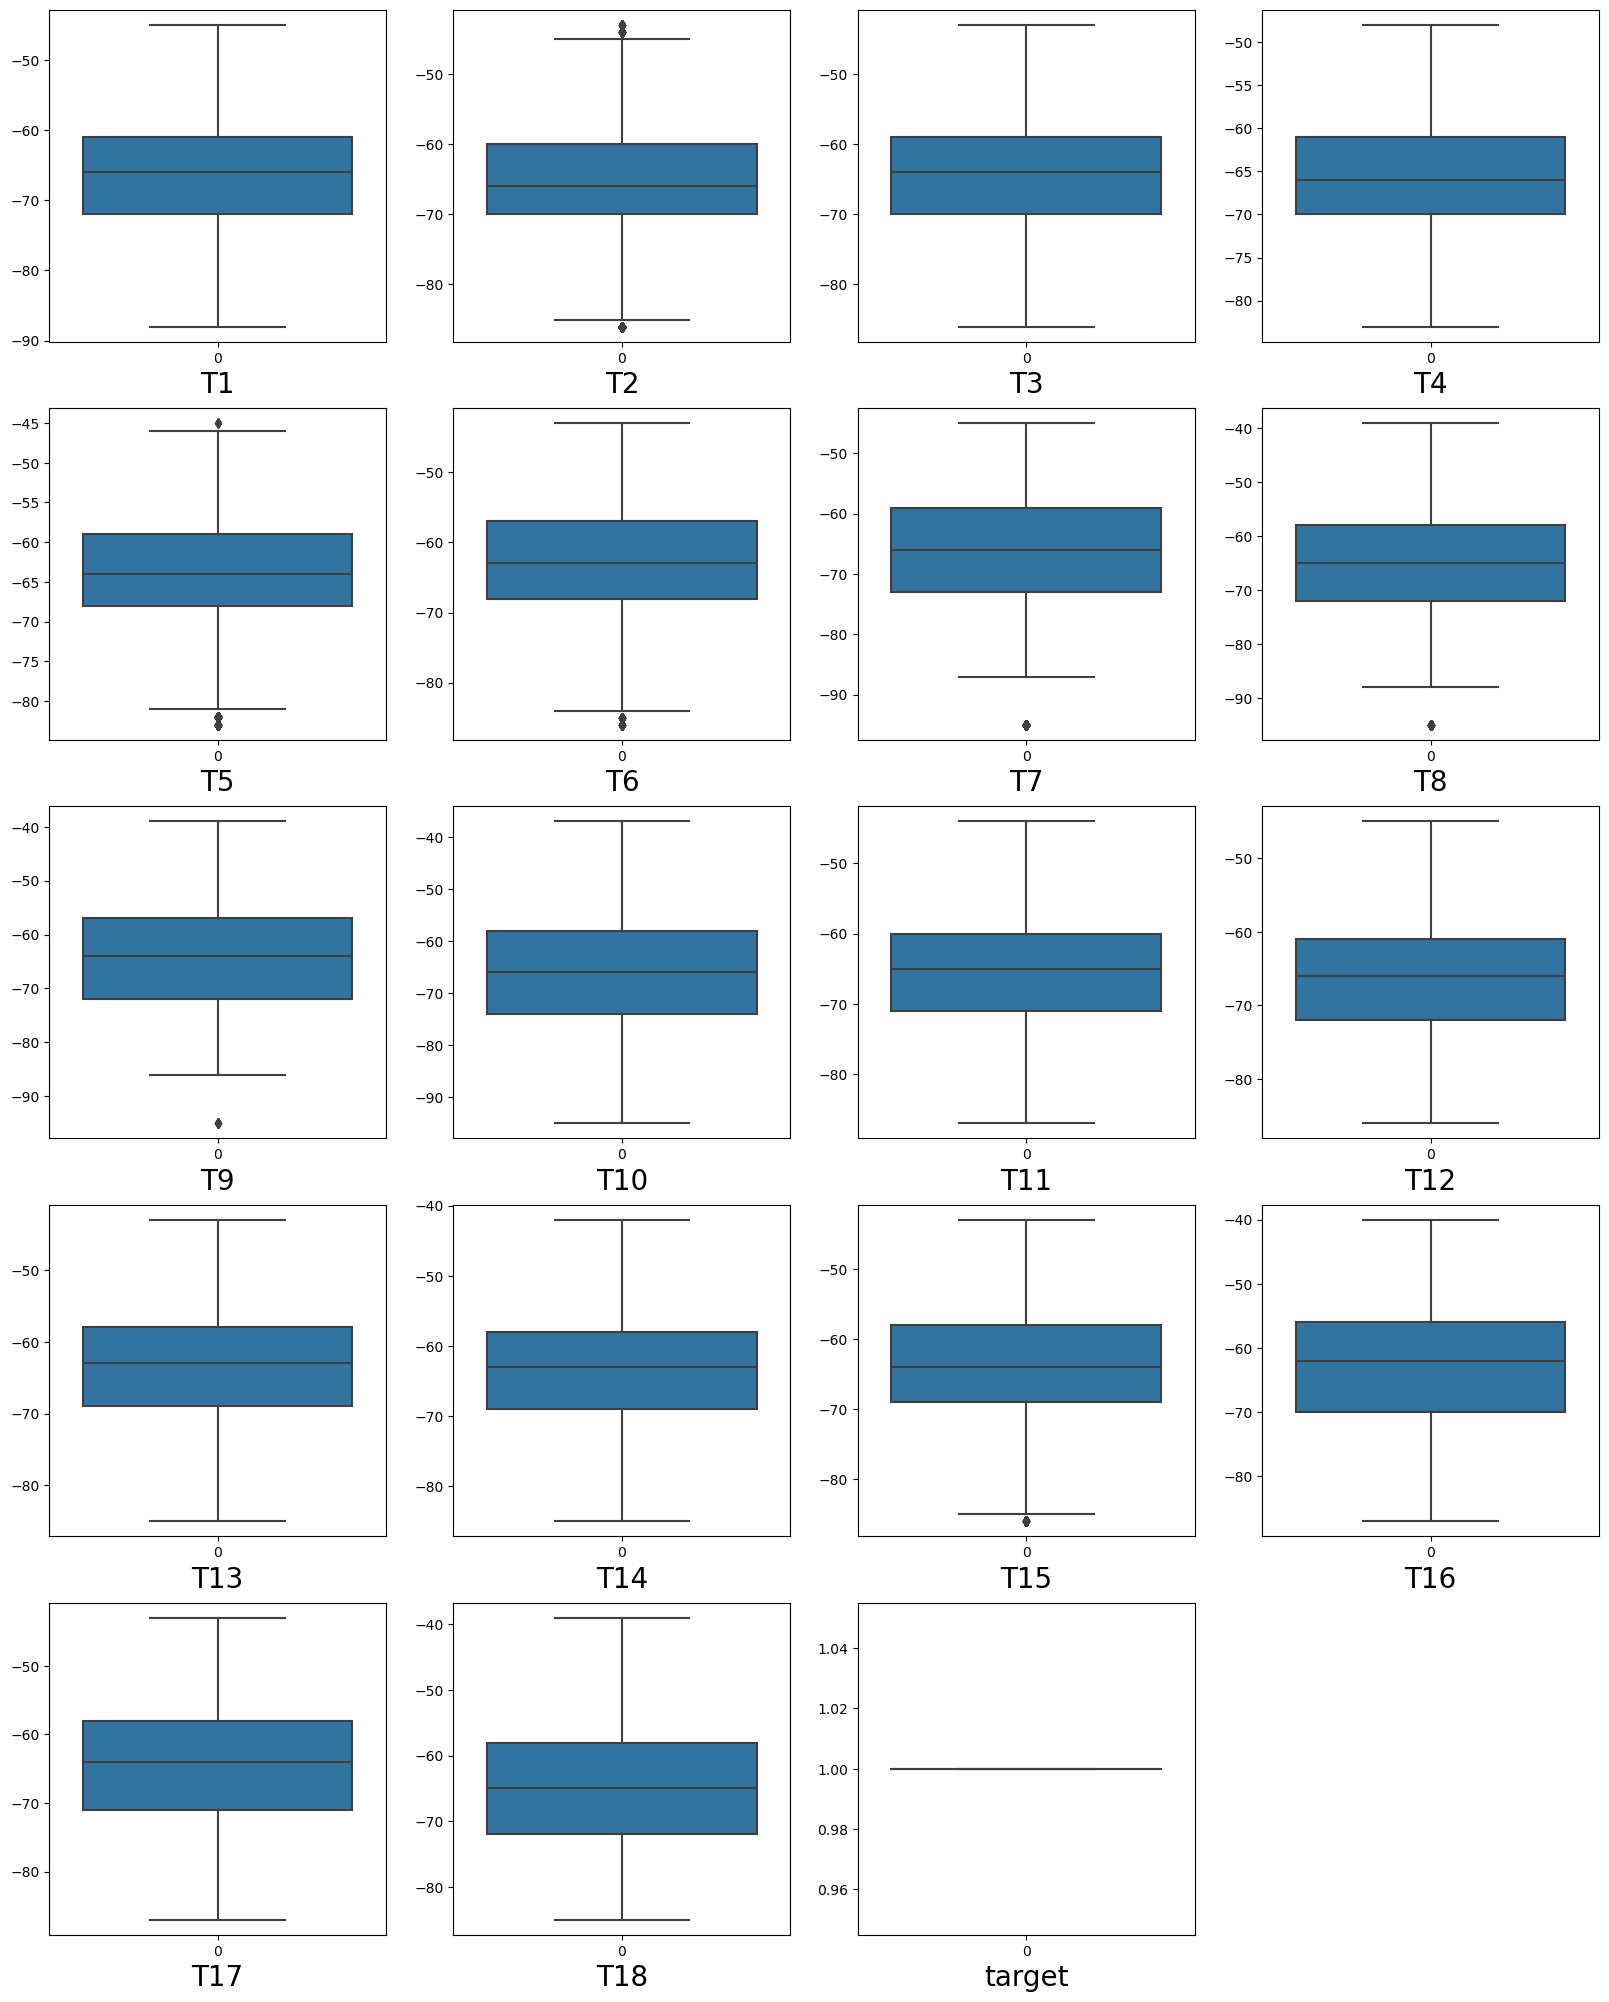

In [92]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

-  Here we see that outliers are moved successfully in train dataset 

## Dividing the independent and dependent columns seperately
 

In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to a single categorical column
train_data['target_encoded'] = label_encoder.fit_transform(train_data['target'])

In [94]:
X = train_data.drop(columns=['target_encoded','target'], axis=1)
y = train_data['target_encoded']

## Scaling 

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
Y_scaled = scaler.fit_transform(test_data)


## Clustering 

In [97]:
from sklearn.cluster import KMeans

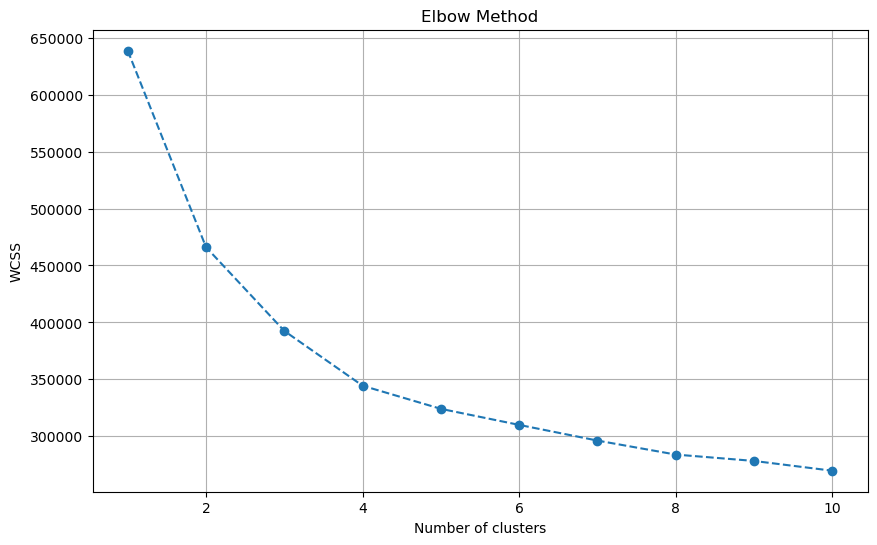

In [98]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

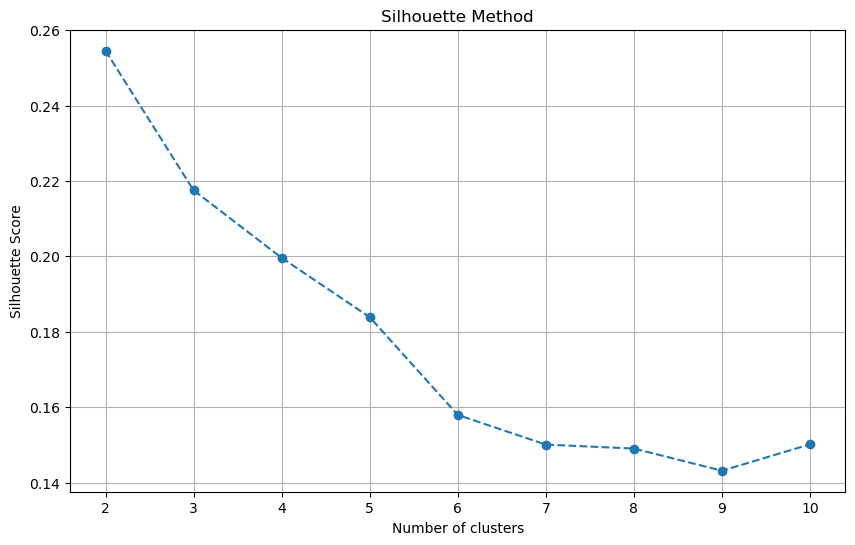

In [105]:
silhouette_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [106]:
def elbow_point(wcss):
    """
    Find the elbow point from the list of within-cluster sum of squares (WCSS) values.
    """
    deltas = [wcss[i] - wcss[i + 1] for i in range(len(wcss) - 1)]
    return deltas.index(max(deltas)) + 1  

In [107]:
from sklearn.metrics import silhouette_score


In [108]:
elbow_optimal_clusters = elbow_point(wcss)
print("Optimal number of clusters (Elbow Method):", elbow_optimal_clusters)

# Extract the optimal number of clusters from the Silhouette Method
silhouette_optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters (Silhouette Method):", silhouette_optimal_clusters)

Optimal number of clusters (Elbow Method): 1
Optimal number of clusters (Silhouette Method): 2


In [110]:
optimal_clusters = min(elbow_optimal_clusters, silhouette_optimal_clusters)


In [111]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=1, random_state=42)

In [112]:
clusters = kmeans.predict(X_scaled)

In [113]:
train_data['Cluster'] = clusters

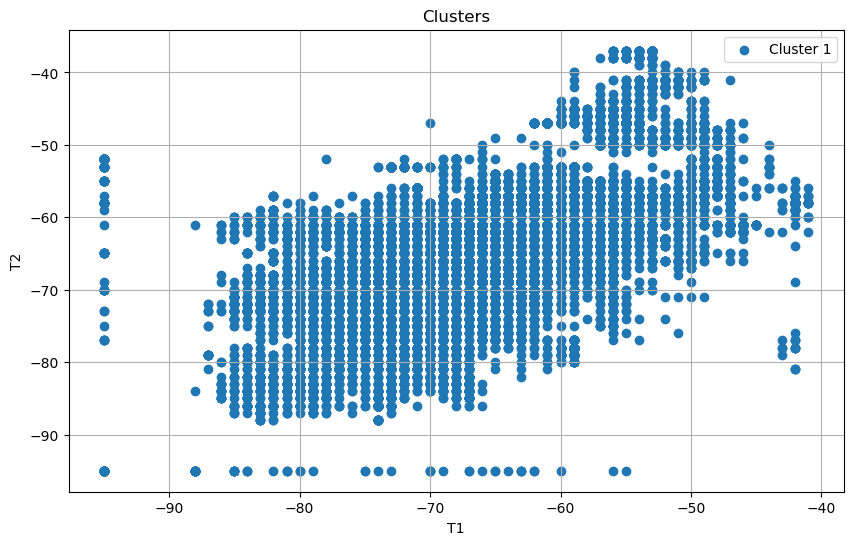

In [114]:
# Plot the clusters using the first two columns as features
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = train_data[train_data['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster + 1}')

plt.title('Clusters')
plt.xlabel(train_data.columns[0])  
plt.ylabel(train_data.columns[1])  
plt.legend()
plt.grid(True)
plt.show()

In [115]:
print("Cluster data columns are:",cluster_data.columns)


Cluster data columns are: Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target',
       'target_encoded', 'Cluster'],
      dtype='object')


In [116]:
# Assign cluster labels to the original data
train_data['Cluster'] = kmeans.labels_

In [118]:
# Function to classify a new data point
def classify_new_point(new_point):
    new_point_scaled = scaler.transform([new_point])
    cluster = kmeans.predict(new_point_scaled)
    return cluster[0]

In [119]:
new_data_point = [-1.26609695, -2.18753632, -0.74022886, -0.05344765,  0.06017375,
       -1.04987638,  0.32616787, -0.23832541,  0.53095939, -1.01418655,
       -1.96270317, -1.46261002, -2.22088796, -1.98578267, -2.02874303,
       -0.71647747,  0.58627792,  0.65475827]  
cluster = classify_new_point(new_data_point)

In [120]:
print("Cluster are:",cluster)


Cluster are: 0


## Task 2 - Train Dataset classification 

In [126]:



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [128]:
Logistic_model = LogisticRegression(max_iter = 1000)


In [129]:
Logistic_model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [130]:
y_pred = Logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression is:", accuracy*100,"%")

Accuracy of Logistic Regression is: 97.1537269268705 %


## Why choose a Logistic Regression?

Logistic regression is chosen for training classification datasets because it is simple, interpretable, and effective for binary classification tasks. It provides probabilistic outputs, is less prone to overfitting for small datasets, and has a straightforward implementation and computational efficiency.








## Another model for test dataset 

In [131]:
# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [132]:
y_pred_xg = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy of XGBoost_classifier is:", accuracy*100,"%")

Accuracy of XGBoost_classifier is: 98.05551641538678 %


In [ ]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


In [ ]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()
